In [2]:
import pandas as pd
import numpy as np
import random
random.seed(621)
data = pd.read_csv('vdjdb.txt', sep="\t", header=0)
data.head(2)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,0,TRB,CASNPSWAYSNQPQHF,TRBV12-3*01,TRBJ1-5*01,HomoSapiens,HLA-B*81:01,B2M,MHCI,TPQDLNTML,...,HIV-1,PMID:16982909,"{""frequency"": ""59/70"", ""identification"": ""tetr...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASNPSWAYSNQPQHF"", ""cdr3_old"": ""CASN...",1,sort,sanger,no,no
1,0,TRB,CASSLTRGTEAFF,TRBV12-3*01,TRBJ1-1*01,HomoSapiens,HLA-B*81:01,B2M,MHCI,TPQDLNTML,...,HIV-1,PMID:16982909,"{""frequency"": ""3/70"", ""identification"": ""tetra...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSLTRGTEAFF"", ""cdr3_old"": ""CASSLTR...",0,sort,sanger,no,no


In [6]:
filteredData = data.filter(['cdr3', 'antigen.epitope', 'vdjdb.score'])
filteredData

,cdr3,antigen.epitope,vdjdb.score
0,CASNPSWAYSNQPQHF,TPQDLNTML,1
1,CASSLTRGTEAFF,TPQDLNTML,0
2,CASTIGGDWNTEAFF,TPQDLNTML,0
3,CASSLGGWDNGAFF,TPQDLNTML,0
4,CASSLGPEAFF,TPQDLNTML,0
...,...,...,...
76159,CAGQLRNNLFF,IVTDFSVIK,0
76160,CASTTGGATGYTF,IVTDFSVIK,0
76161,CALMVYGGSQGNLIF,IVTDFSVIK,0
76162,CASSWGGAAQFF,IVTDFSVIK,0


In [30]:
# Split data up by VDJDB scores into testing Data
dfs = dict(tuple(filteredData.groupby('vdjdb.score')))
for i in dfs:
    dfs[i] = dfs[i].filter(['antigen.epitope', 'cdr3'])
dfs[0].to_csv('vdjdbscore0.txt', sep='\t', header=False, index=False)
dfs[1].to_csv('vdjdbscore1.txt', sep='\t', header=False, index=False)
dfs[2].to_csv('vdjdbscore2.txt', sep='\t', header=False, index=False)
dfs[3].to_csv('vdjdbscore3.txt', sep='\t', header=False, index=False)

count    669.000000
mean       0.169672
std        0.295497
min        0.000356
25%        0.001121
50%        0.004517
75%        0.182718
max        1.000000
Name: prediction, dtype: float64

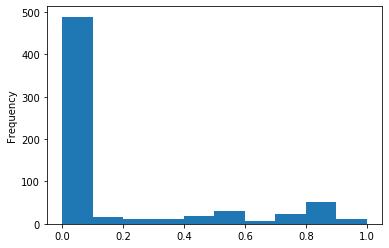

In [44]:
# Read in extracted data from NetTCR
data0 = pd.read_csv('NetTCR_vdjdb0.txt', sep="\t", header=0)
data1 = pd.read_csv('NetTCR_vdjdb1.txt', sep="\t", header=0)
data2 = pd.read_csv('NetTCR_vdjdb2.txt', sep="\t", header=0)
data3 = pd.read_csv('NetTCR_vdjdb3.txt', sep="\t", header=0)

display(data3['prediction'].describe())
display(data3['prediction'].plot.hist())